---
title: Simulation for the urn model example for stochastic approximation
keywords:
   - stochastic approximation
   - urn model
---

# Initialization

In [1]:
using Plots, LaTeXStrings
current_theme = :bright
current_colors = theme_palette(current_theme)
theme(current_theme)

In [2]:
# Use the incomplete beta function as an example
# The function returns a tuple and we are only interested in the first value
using SpecialFunctions: beta_inc
p(θ) = beta_inc(5,5, θ)[1]

p (generic function with 1 method)

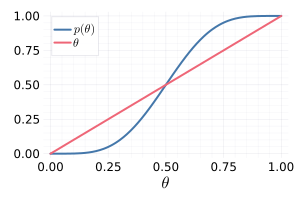

In [3]:
#| column: margin
#| label: fig-p-vs-theta
#| fig-cap: Example of $p$ such that there are multiple solutions to $p(θ) = θ$.
default(linewidth=2, size=(300,200), xlab=L"\theta")
plt = plot(p, 0, 1, label=L"p(\theta)")
plot!(plt, θ->θ, 0, 1, label=L"\theta")

# Discrete-time dynamics

In [4]:
using Distributions, Random

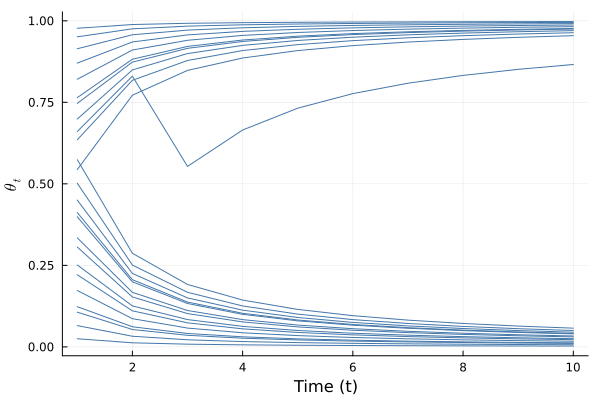

In [5]:
#| label: fig-urn-multiple-runs
#| fig-cap: Multiple runs of the urn model (@exm-urn-model) for different initial conditions.
#| echo: true

Random.seed!(42)

T = 10       # Number of time steps
M = 25       # Number of different runs
α = zeros(T)
for t in 1:T
    α[t] = 1/(t+1)
end

θ = zeros(T,M)
for m in 1:M
    θ[1,m] = mod((m/M + rand()/M),1)
    for t in 1:T-1
        θ[t+1,m] = θ[t,m] + α[t]*(rand(Bernoulli(p(θ[t,m]))) - θ[t,m])
    end
end

default() # Reset plotting defaults
plot(1:T, θ, leg=false, color=current_colors[1], xlab="Time (t)", ylab=L"\theta_t")